# Examine Results

In [1]:
from pathlib import Path

from convnwb.io import get_files, load_json

from spiketools.plts.data import plot_hist
from spiketools.plts.utils import make_axes

In [2]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [3]:
# Set which task to run
task = 'THO'

In [4]:
# Set the folder to load results from
base_path = Path('../results/units/')
data_path = base_path / task

In [5]:
# Get the list of files
res_files = get_files(data_path)

In [6]:
# Check the number of available files
n_files = len(res_files)

## Load Example File

In [7]:
# Load an example file
file = res_files[0]
data = load_json(file, folder=str(data_path))

In [8]:
# Check example file
data

{'fr_t_val': -0.3947023007073317,
 'fr_p_val': 0.6939861807765166,
 'place_info': 0.43189928805257255,
 'place_p_val': 0.56,
 'place_z_score': -0.20535034209947725,
 'target_info': 0.24662650398405545,
 'target_p_val': 0.19,
 'target_z_score': 0.7952972807765772,
 'hd_z_val': 6.11964449834782,
 'hd_p_val': 0.002182346089050063,
 'hd_surr_p': 0.54,
 'hd_surr_z': -0.23933356216641574}

## Collect Results

In [9]:
vals = {'chest' : [], 'place' : [], 'target' : [], 'head' : []}
sig = {'chest' : 0, 'place' : 0, 'target' : 0, 'head' : 0}
files = {'chest' : [], 'place' : [], 'target' : [], 'head' : []}

for file in res_files:
    
    data = load_json(file, folder=data_path)
        
    # Collect general values
    vals['chest'].append(data['fr_t_val'])
    vals['place'].append(data['place_info'])
    vals['target'].append(data['target_info'])
    vals['head'].append(data['hd_z_val'])
    
    # Collect counts of significant cells
    if data['fr_p_val'] < 0.05:
        sig['chest'] += 1
        files['chest'].append(file)
    if data['place_p_val'] < 0.05:
        sig['place'] += 1
        files['place'].append(file)
    if data['target_p_val'] < 0.05:
        sig['target'] += 1
        files['target'].append(file)
    if data['hd_p_val'] < 0.05:
        sig['head'] += 1
        files['head'].append(file)

## Check Results

In [10]:
# Check the total number of cells
print('Total number of cells: {}'.format(n_files))

Total number of cells: 333


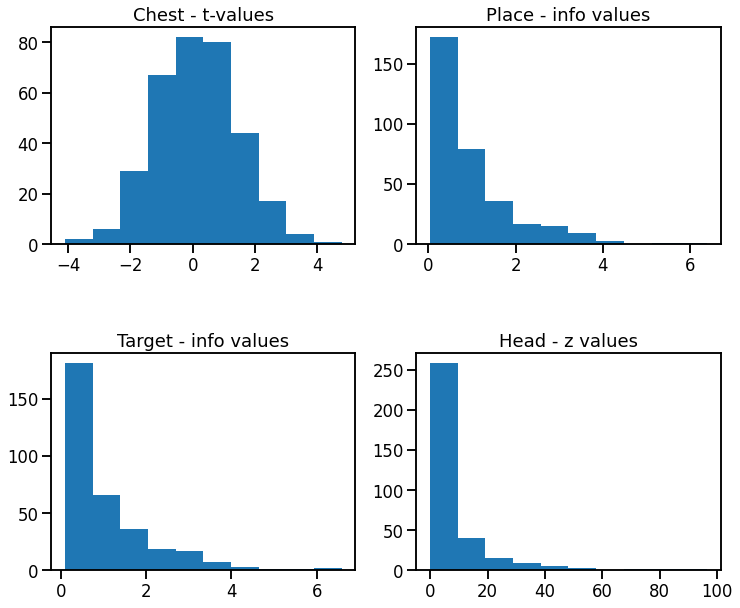

In [11]:
# Plot the distributions of measured values
axes = make_axes(4, 2, figsize=(12, 10), hspace=0.5)
plot_hist(vals['chest'], title='Chest - t-values', ax=axes[0])
plot_hist(vals['place'], title='Place - info values', ax=axes[1])
plot_hist(vals['target'], title='Target - info values', ax=axes[2])
plot_hist(vals['head'], title='Head - z values', ax=axes[3])

In [12]:
# Check number of significant cells
for key, val in sig.items():
    print('{:3d} {:7s} cells ({:1.2f}%)'.format(val, key, val/n_files * 100))

 39 chest   cells (11.71%)
 12 place   cells (3.60%)
 13 target  cells (3.90%)
186 head    cells (55.86%)
